## Conversor de mascaras utilizando pycococreatortools.py

In [1]:
import sys
import os
sys.path.append('./pycococreator-0.2.0/pycococreatortools')
from pycococreatortools import *
from PIL import Image
import numpy as np
from numpy import asarray
import PIL.ImageOps  

In [9]:
# load the image
#image = Image.open('./IMG/Castings/C0001/masks/C0001_0001_0.png')
image = Image.open('./IMG/Welding/J0001/masks/J0001_0000_0.png')
#image = Image.open('./IMG/Welding/P0001/masks/P0001_0002_0.png')
# convert image to numpy array
data = asarray(image.convert("L"))

print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
#image2 = PIL.ImageOps.invert(image2)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(570, 736)
<class 'PIL.Image.Image'>
L
(736, 570)


In [10]:
print(data) # MATRIZ DE 0 marcada el area en 1's

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
np.count_nonzero(data != 0)

59

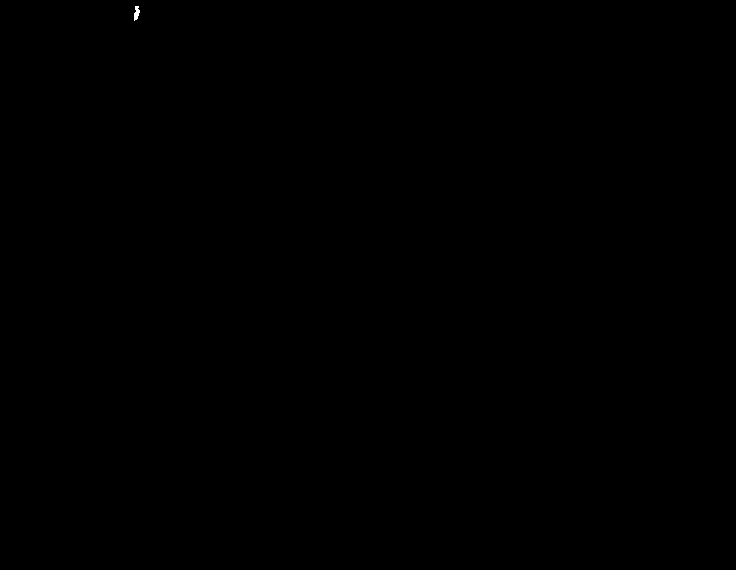

In [12]:
image2

In [201]:
#image2.save("./IMG/Welding/P0001/masks/imagenNueva.png") 

In [13]:
poligonos = binary_mask_to_polygon(data)

In [14]:
print(poligonos)

[[134.0, 20.998039215686276, 133.00196078431372, 20.0, 133.00196078431372, 19.0, 133.00196078431372, 18.0, 133.00196078431372, 17.0, 133.00196078431372, 16.0, 133.00196078431372, 15.0, 133.00196078431372, 14.0, 133.00196078431372, 13.0, 134.0, 12.001960784313725, 134.00196078431372, 12.0, 135.0, 11.001960784313725, 135.00196078431372, 11.0, 135.00196078431372, 10.0, 135.0, 9.998039215686275, 134.00196078431372, 9.0, 134.00196078431372, 8.0, 134.00196078431372, 7.0, 134.00196078431372, 6.0, 135.0, 5.0019607843137255, 136.0, 5.0019607843137255, 137.0, 5.0019607843137255, 138.0, 5.0019607843137255, 138.99803921568628, 6.0, 138.99803921568628, 7.0, 138.0, 7.9980392156862745, 137.99803921568628, 8.0, 138.0, 8.001960784313725, 138.99803921568628, 9.0, 139.0, 9.001960784313725, 139.99803921568628, 10.0, 139.99803921568628, 11.0, 139.99803921568628, 12.0, 139.0, 12.998039215686275, 138.99803921568628, 13.0, 138.99803921568628, 14.0, 138.99803921568628, 15.0, 138.0, 15.998039215686276, 137.9980

In [15]:
rle = binary_mask_to_rle(data)

In [16]:
print(rle)

{'counts': [76393, 8, 555, 4, 2, 8, 556, 14, 556, 13, 557, 2, 1, 7, 564, 3, 340277], 'size': [570, 736]}


In [17]:
## ANOTACION 0 de la imagen 0
annotation_id = 1
image_id = 0
tolerance = 2
binary_mask = data
is_crowd = False
category_info = {
        "id": 0,
        "is_crowd": False
    }
if category_info["is_crowd"]:
    print(True)
else:
    print(False)

False


In [18]:
create_annotation_info(annotation_id, image_id, category_info, binary_mask, 
                           image_size=None, tolerance=0, bounding_box=None)

{'id': 1,
 'image_id': 0,
 'category_id': 0,
 'iscrowd': 0,
 'area': 59,
 'bbox': [134.0, 6.0, 6.0, 15.0],
 'segmentation': [[134.0,
   20.998039215686276,
   133.00196078431372,
   20.0,
   133.00196078431372,
   19.0,
   133.00196078431372,
   18.0,
   133.00196078431372,
   17.0,
   133.00196078431372,
   16.0,
   133.00196078431372,
   15.0,
   133.00196078431372,
   14.0,
   133.00196078431372,
   13.0,
   134.0,
   12.001960784313725,
   134.00196078431372,
   12.0,
   135.0,
   11.001960784313725,
   135.00196078431372,
   11.0,
   135.00196078431372,
   10.0,
   135.0,
   9.998039215686275,
   134.00196078431372,
   9.0,
   134.00196078431372,
   8.0,
   134.00196078431372,
   7.0,
   134.00196078431372,
   6.0,
   135.0,
   5.0019607843137255,
   136.0,
   5.0019607843137255,
   137.0,
   5.0019607843137255,
   138.0,
   5.0019607843137255,
   138.99803921568628,
   6.0,
   138.99803921568628,
   7.0,
   138.0,
   7.9980392156862745,
   137.99803921568628,
   8.0,
   138.0,
  

## Creando JSON

# 1. Crear JSON y Array images

In [2]:
"""
 En el directorio "Con Mascara" y en particular "Castings" se recorrera cada carpeta y los ficheros .png
 seran añadidos al array de Imágenes, finalmente escrito en el fichero.
 Formato:
     height
     width
     id
     file_name 
"""
import json

# Pequeña funcion que guarda formateado al fichero el diccionario actual
def guardaJson(dic, fichero):
    with open(fichero, 'w') as fichero:
        json.dump(dic, fichero, indent = 4)
    fichero.close()

''' 
# PRUEBAS

fichero= '.'+os.sep+'IMG'+os.sep+'info.json'

datos = {}

datos['images'] = []
datos['images'].append({
    'height':5,
    'width': 1,
    'id': 'Dale canffdela'
})

datos['images'].append({
    'height':5,
    'width': 21,
    'id': 'Dafasfa'
})

guardaJson(datos,fichero)

''' 

" \n# PRUEBAS\n\nfichero= '.'+os.sep+'IMG'+os.sep+'info.json'\n\ndatos = {}\n\ndatos['images'] = []\ndatos['images'].append({\n    'height':5,\n    'width': 1,\n    'id': 'Dale canffdela'\n})\n\ndatos['images'].append({\n    'height':5,\n    'width': 21,\n    'id': 'Dafasfa'\n})\n\nguardaJson(datos,fichero)\n\n"

In [3]:
''' 
Funcion que recibe un directorio y un nombre para el fichero, escanea solo imagenes y no mascaras y
las registra en la primera seccion del JSON
'''

def registraImages(directorio, nombreJson):
    fichero = '.' + os.sep +'IMG'+ os.sep + nombreJson +'.json'
    datosJson = {}
    extensiones = [".png",".jpg"]
    datosJson['images'] = []
    ID = 0
    for root, dirs, files in os.walk(directorio_imagenes):
        path = root.split(os.sep)
        if (os.path.basename(root) != 'masks'):
            for file in files:
                extension = os.path.splitext(file)[1]
                if extension in extensiones:
                    im = Image.open(root+os.sep+file)
                    width, height = im.size
                    datosJson['images'].append({
                        'height': height,
                        'width': width,
                        'id': ID,
                        'file_name': file
                    })
                    ID+=1
    return datosJson['images']

In [29]:
directorio_imagenes = '.'+os.sep+'IMG'
fichero = 'info'
registraImages(directorio_imagenes, fichero)

[{'height': 570, 'width': 736, 'id': 0, 'file_name': 'J0001_0000.png'},
 {'height': 570, 'width': 736, 'id': 1, 'file_name': 'J0001_0001.png'},
 {'height': 570, 'width': 736, 'id': 2, 'file_name': 'J0001_0002.png'},
 {'height': 570, 'width': 736, 'id': 3, 'file_name': 'J0001_0003.png'},
 {'height': 570, 'width': 736, 'id': 4, 'file_name': 'J0001_0004.png'},
 {'height': 570, 'width': 736, 'id': 5, 'file_name': 'J0001_0005.png'},
 {'height': 570, 'width': 736, 'id': 6, 'file_name': 'J0001_0006.png'},
 {'height': 570, 'width': 736, 'id': 7, 'file_name': 'J0001_0007.png'},
 {'height': 570, 'width': 736, 'id': 8, 'file_name': 'J0001_0008.png'},
 {'height': 570, 'width': 736, 'id': 9, 'file_name': 'J0001_0009.png'},
 {'height': 570, 'width': 736, 'id': 10, 'file_name': 'P0001_0000.png'},
 {'height': 570, 'width': 736, 'id': 11, 'file_name': 'P0001_0001.png'},
 {'height': 570, 'width': 736, 'id': 12, 'file_name': 'P0001_0002.png'},
 {'height': 570, 'width': 736, 'id': 13, 'file_name': 'P0001_

In [32]:
''' 
Funcion que recibe un directorio y un nombre para el fichero, segun las carpetas en IMG, 
genera una nueva categoria

'''

def registraCategories(directorio, nombreJson):
    fichero = '.' + os.sep +'IMG'+ os.sep + nombreJson +'.json'
    
    dir_list = next(os.walk('.' + os.sep +'IMG'))[1]
    
    datosJson = {}
    datosJson['categories'] = []
    ID = 1
    
    for d in dir_list:
        datosJson['categories'].append({
                            'supercategory': 'Defect',
                            'id': ID,
                            'name': d
                        })
        ID+=1
    return datosJson['categories']  
    

In [33]:
fichero = 'info'
registraCategories(directorio_imagenes, fichero)

[{'supercategory': 'Defect', 'id': 1, 'name': 'Welding'}]

In [34]:
''' 
Funcion que recibe un directorio y un nombre para el fichero, recorre imagenes y busca sus mascaras
genera la segmentacion y anotaciones y escribe en el JSON
'''

def registraAnnotations(directorio, nombreJson):
    datosJson = {}    
    fichero = '.' + os.sep +'IMG'+ os.sep + nombreJson +'.json'
    datosJson['images'] = registraImages(directorio_imagenes, fichero)
    datosJson['categories'] = registraCategories(directorio_imagenes, fichero)
    extensiones = [".png",".jpg"]
    datosJson['annotations'] = []
    ID = 0
    IDImagen = 0
    for root, dirs, files in os.walk(directorio_imagenes):
        path = root.split(os.sep)
        if (os.path.basename(root) != 'masks'):
            for file in files:                
                extension = os.path.splitext(file)[1]
                if extension in extensiones:
                    directorio_mascaras = root + os.sep + 'masks'
                    for rootm, dirm, mascaras in os.walk(directorio_mascaras):
                        fileN = file.replace(extension,'')
                        for mascara in mascaras:                      
                            if fileN in mascara:
                                image = Image.open(directorio_mascaras+ os.sep+mascara)
                                #data = asarray(image)
                                data = asarray(image.convert("L"))
                                
                                annotation_id = ID
                                image_id = IDImagen
                                tolerance = 2
                                binary_mask = data
                                is_crowd = False
                                
                                if 'Castings' in path:
                                      category_info = {
                                            "id": 0,
                                            "is_crowd": False
                                        }
                                elif 'Welding' in path:
                                        category_info = {
                                            "id": 1,
                                            "is_crowd": False
                                        }
                                elif 'Welds' in path:
                                        category_info = {
                                            "id": 2,
                                            "is_crowd": False
                                        }
                                    
                                annotation = create_annotation_info(annotation_id, image_id, category_info, binary_mask, 
                           image_size=None, tolerance=2, bounding_box=None)
                                datosJson['annotations'].append(annotation)
                                ID+=1
                    IDImagen+=1
                
    guardaJson(datosJson,fichero)
                                


In [35]:
directorio_imagenes = '.'+os.sep+'IMG'
fichero = 'info'
registraAnnotations(directorio_imagenes, fichero)